# AirBnB Exploratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [4]:
def load_review_data(directory):
    """Load Review Data"""
    reviews_df = pd.read_csv(directory + 'interim/review_wrangled.csv', sep=';', lineterminator='\n').drop(columns=['Unnamed: 0'])
    
    return reviews_df

In [6]:
# Select City
country = 'united-states'
city = 'san-francisco'

# Directory
directory = 'data/' + country + '/' + city + '/'

# Load Data
reviews_df = load_review_data(directory)

In [7]:
reviews_df.head(2)

,listing_id,id,date,comments,tokens,tokens_count,name_entities,name_entities_count,comments_no_ne,no_ne_tokens,no_ne_tokens_count,nouns,nouns_counts,verbs,verbs_counts,adjectives,adjectives_counts
0,958,5977,2009-07-23,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",47,"['David', 'Haight', 'Castro', 'Golden Gate Par...",5,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",39,"['experience', 'doubt', 'star', 'experience', ...",30,"[u'be', u'be', 'accomodating', u'honor', u'be'...",10,"['consummate', 'full', 'perfect', 'full', 'clo...",6
1,958,6660,2009-08-03,Returning to San Francisco is a rejuvenating t...,"['returning', 'san', 'francisco', 'rejuvenatin...",36,"['San Francisco', 'Holly', 'David']",3,Returning to is a rejuvenating thrill but thi...,"['returning', 'rejuvenating', 'thrill', 'time'...",32,"['san', 'francisco', 'rejuvenating', 'thrill',...",19,"[u'return', u'be', u'be', u'enhance', u'renova...",14,"['great', 'local', 'such', 'amenable']",4


In [8]:
reviews_df.shape

(313199, 17)

# Clean Data

In [31]:
import ast

"""String Lists to Lists"""
reviews_df['tokens'] = reviews_df['tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['name_entities'] = reviews_df['name_entities'].map(lambda x: ast.literal_eval(x))
reviews_df['no_ne_tokens'] = reviews_df['no_ne_tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['nouns'] = reviews_df['nouns'].map(lambda x: ast.literal_eval(x))
reviews_df['verbs'] = reviews_df['verbs'].map(lambda x: ast.literal_eval(x))
reviews_df['adjectives'] = reviews_df['adjectives'].map(lambda x: ast.literal_eval(x))

In [43]:
# Get year for date data
reviews_df['year'] = reviews_df['date'].dt.year

# 1. Full Comments

## Plot Comment Length Distribution

In [83]:
def plot_counts_distribution(data, title):
    '''Plot Counts'''
    _ = plt.figure(figsize=(12,6))
    _ = plt.hist(data, bins=50)
    _ = plt.axvline(np.mean(data), color='red')
    _ = plt.title(title, size=13)
    _ = plt.xlabel('Token Count')
    _ = plt.ylabel('# of Reviews')
    print(np.mean(data))
    _ = plt.show()

29.64165913684271


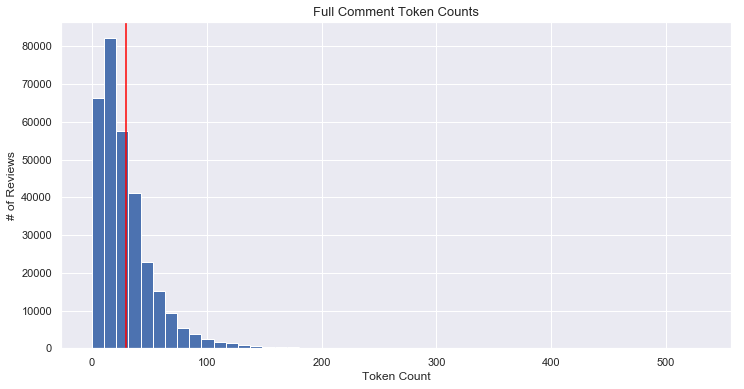

In [84]:
plot_counts_distribution(reviews_df['tokens_count'], 'Full Comment Token Counts')

## Avg. Comment Length By Year

In [86]:
def plt_avg_over_time(data, count, title):
    _ = plt.figure(figsize=(10,5))
    _ = plt.plot(data.groupby('year')[[count]].mean())
    _ = plt.plot(data.groupby('year')[[count]].quantile(0.5))
    _ = plt.legend(['Mean','Median'])
    _ = plt.title(title, size=13)
    _ = plt.show()

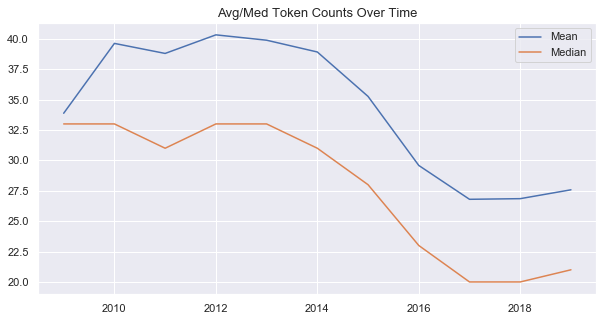

In [87]:
plt_avg_over_time(reviews_df, 'tokens_count', 'Avg/Med Token Counts Over Time')

# 2. Name Entities

1.9558204208825698


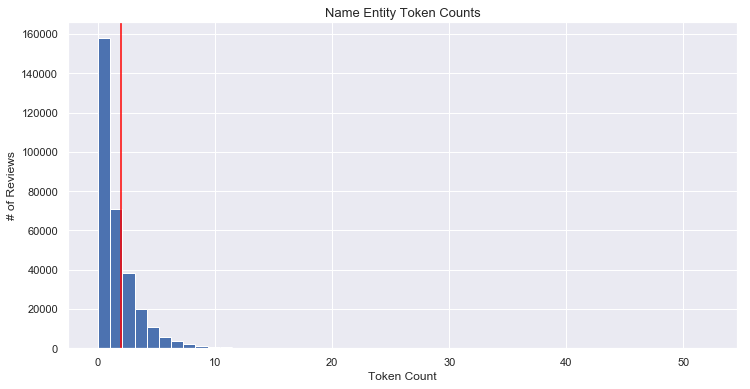

In [98]:
plot_counts_distribution(reviews_df['name_entities_count'], 'Name Entity Token Counts')

# 3. Non-Name Entities

27.176446923521468


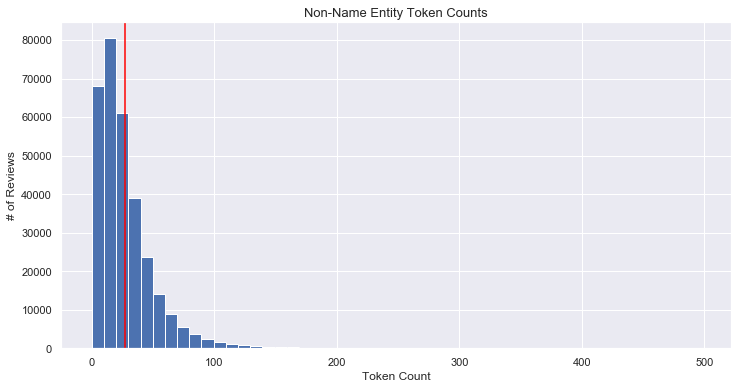

In [88]:
plot_counts_distribution(reviews_df['no_ne_tokens_count'], 'Non-Name Entity Token Counts')

# Nouns Counts

14.659686014323162


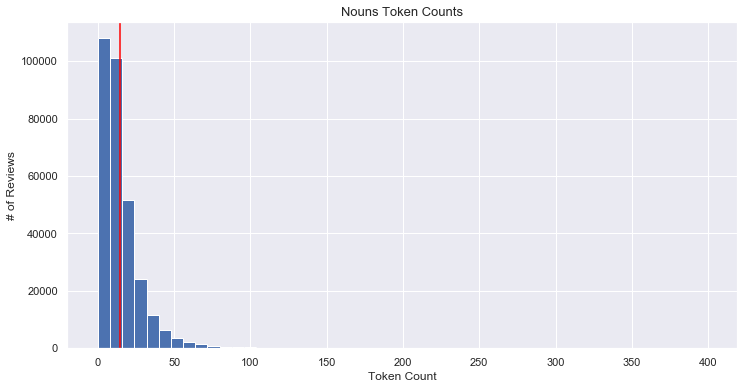

In [89]:
plot_counts_distribution(reviews_df['nouns_counts'], 'Nouns Token Counts')

# Verb Counts

7.675723741135827


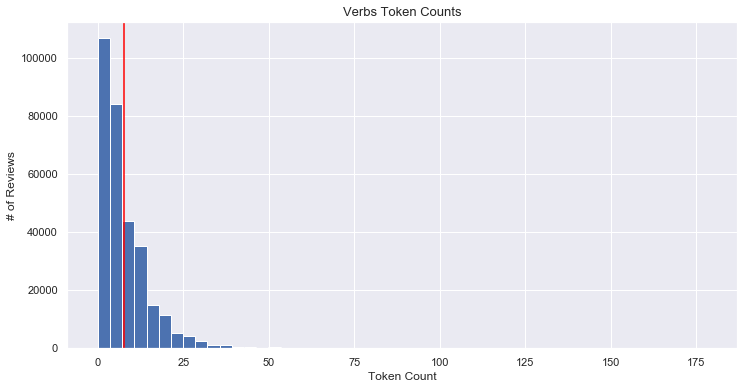

In [90]:
plot_counts_distribution(reviews_df['verbs_counts'], 'Verbs Token Counts')

# Adjective Counts

6.278449164907934


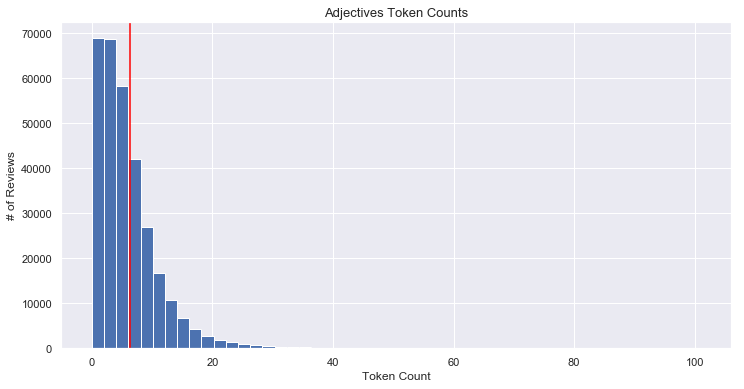

In [91]:
plot_counts_distribution(reviews_df['adjectives_counts'], 'Adjectives Token Counts')